# Personal Project - Flight Delay - Working Notebook

In [72]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from datetime import timedelta, datetime
import csv

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from scipy import stats
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, spearmanr, kruskal


from env import user, password, host
import flight_delay_acquire
import flight_delay_prepare
import explore

In [2]:
# Expanding the columns I can visualize
pd.set_option('display.max_columns', 500)

In [65]:
# Expanding the rows I can visualize
pd.options.display.max_rows = 500

# Data Dictionary

|    |   Variable descriptions | Unnamed: 1        | Unnamed: 2                                                                |
|---:|------------------------:|:------------------|:--------------------------------------------------------------------------|
|  0 |                     nan | nan               | nan                                                                       |
|  1 |                     nan | Name              | Description                                                               |
|  2 |                       1 | Year              | 1987-2008                                                                 |
|  3 |                       2 | Month             | 12-Jan                                                                    |
|  4 |                       3 | DayofMonth        | 31-Jan                                                                    |
|  5 |                       4 | DayOfWeek         | 1 (Monday) - 7 (Sunday)                                                   |
|  6 |                       5 | DepTime           | actual departure time (local, hhmm)                                       |
|  7 |                       6 | CRSDepTime        | scheduled departure time (local, hhmm)                                    |
|  8 |                       7 | ArrTime           | actual arrival time (local, hhmm)                                         |
|  9 |                       8 | CRSArrTime        | scheduled arrival time (local, hhmm)                                      |
| 10 |                       9 | UniqueCarrier     | unique carrier code                                                       |
| 11 |                      10 | FlightNum         | flight number                                                             |
| 12 |                      11 | TailNum           | plane tail number                                                         |
| 13 |                      12 | ActualElapsedTime | in minutes                                                                |
| 14 |                      13 | CRSElapsedTime    | in minutes                                                                |
| 15 |                      14 | AirTime           | in minutes                                                                |
| 16 |                      15 | ArrDelay          | arrival delay, in minutes                                                 |
| 17 |                      16 | DepDelay          | departure delay, in minutes                                               |
| 18 |                      17 | Origin            | origin IATA airport code                                                  |
| 19 |                      18 | Dest              | destination IATA airport code                                             |
| 20 |                      19 | Distance          | in miles                                                                  |
| 21 |                      20 | TaxiIn            | taxi in time, in minutes                                                  |
| 22 |                      21 | TaxiOut           | taxi out time in minutes                                                  |
| 23 |                      22 | Cancelled         | was the flight cancelled?                                                 |
| 24 |                      23 | CancellationCode  | reason for cancellation (A = carrier, B = weather, C = NAS, D = security) |
| 25 |                      24 | Diverted          | 1 = yes, 0 = no                                                           |
| 26 |                      25 | CarrierDelay      | in minutes                                                                |
| 27 |                      26 | WeatherDelay      | in minutes                                                                |
| 28 |                      27 | NASDelay          | in minutes                                                                |
| 29 |                      28 | SecurityDelay     | in minutes                                                                |
| 30 |                      29 | LateAircraftDelay | in minutes                                                                |

# Acquire

In [3]:
# Calling wrangle function from acquire.py
df = flight_delay_acquire.wrangle_flight_delay()

In [4]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,ONT,389,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,N370,85.0,90.0,74.0,8.0,13.0,SMF,PDX,479,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,N685,88.0,90.0,73.0,34.0,36.0,SMF,PDX,479,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,N364,86.0,90.0,75.0,26.0,30.0,SMF,PDX,479,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,N480,86.0,90.0,74.0,-3.0,1.0,SMF,PDX,479,3,9,0,NaN,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

# Preparation

In [6]:
df, train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = flight_delay_prepare.prep_flight_delay(df)

In [7]:
df.head()

,Year,Month,dayofmonth,weekday,depart,scheduled_depart,arrive,scheduled_arrive,UniqueCarrier,FlightNum,TailNum,total_time,scheduled_total_time,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,total_delay,total_time_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,uniq_carr_9E,uniq_carr_AA,uniq_carr_AQ,uniq_carr_AS,uniq_carr_B6,uniq_carr_CO,uniq_carr_DL,uniq_carr_EV,uniq_carr_F9,uniq_carr_FL,uniq_carr_HA,uniq_carr_MQ,uniq_carr_NW,uniq_carr_OH,uniq_carr_OO,uniq_carr_UA,uniq_carr_US,uniq_carr_WN,uniq_carr_XE,uniq_carr_YV
0,2007,1,1,1,1232,1225,1341,1340,WN,2891,N351,69,75,54,1,7,SMF,ONT,389,4,11,0,0,0,0,0,0,0,8,-6,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2007,1,1,1,1918,1905,2043,2035,WN,462,N370,85,90,74,8,13,SMF,PDX,479,5,6,0,0,0,0,0,0,0,21,-5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2007,1,1,1,2206,2130,2334,2300,WN,1229,N685,88,90,73,34,36,SMF,PDX,479,6,9,0,0,3,0,0,0,31,70,-2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2007,1,1,1,1230,1200,1356,1330,WN,1355,N364,86,90,75,26,30,SMF,PDX,479,3,8,0,0,23,0,0,0,3,56,-4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2007,1,1,1,831,830,957,1000,WN,2278,N480,86,90,74,-3,1,SMF,PDX,479,3,9,0,0,0,0,0,0,0,-2,-4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7275288 entries, 0 to 7453214
Data columns (total 69 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Year                  int64 
 1   Month                 int64 
 2   dayofmonth            int64 
 3   weekday               int64 
 4   depart                int64 
 5   scheduled_depart      int64 
 6   arrive                int64 
 7   scheduled_arrive      int64 
 8   UniqueCarrier         object
 9   FlightNum             int64 
 10  TailNum               object
 11  total_time            int64 
 12  scheduled_total_time  int64 
 13  AirTime               int64 
 14  ArrDelay              int64 
 15  DepDelay              int64 
 16  Origin                object
 17  Dest                  object
 18  Distance              int64 
 19  TaxiIn                int64 
 20  TaxiOut               int64 
 21  Cancelled             int64 
 22  Diverted              int64 
 23  CarrierDelay          int64 
 24

In [9]:
df['total_time_diff'] = df['total_time'] - df['scheduled_total_time']

In [10]:
df.head()

,Year,Month,dayofmonth,weekday,depart,scheduled_depart,arrive,scheduled_arrive,UniqueCarrier,FlightNum,TailNum,total_time,scheduled_total_time,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,total_delay,total_time_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,uniq_carr_9E,uniq_carr_AA,uniq_carr_AQ,uniq_carr_AS,uniq_carr_B6,uniq_carr_CO,uniq_carr_DL,uniq_carr_EV,uniq_carr_F9,uniq_carr_FL,uniq_carr_HA,uniq_carr_MQ,uniq_carr_NW,uniq_carr_OH,uniq_carr_OO,uniq_carr_UA,uniq_carr_US,uniq_carr_WN,uniq_carr_XE,uniq_carr_YV
0,2007,1,1,1,1232,1225,1341,1340,WN,2891,N351,69,75,54,1,7,SMF,ONT,389,4,11,0,0,0,0,0,0,0,8,-6,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2007,1,1,1,1918,1905,2043,2035,WN,462,N370,85,90,74,8,13,SMF,PDX,479,5,6,0,0,0,0,0,0,0,21,-5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2007,1,1,1,2206,2130,2334,2300,WN,1229,N685,88,90,73,34,36,SMF,PDX,479,6,9,0,0,3,0,0,0,31,70,-2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2007,1,1,1,1230,1200,1356,1330,WN,1355,N364,86,90,75,26,30,SMF,PDX,479,3,8,0,0,23,0,0,0,3,56,-4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2007,1,1,1,831,830,957,1000,WN,2278,N480,86,90,74,-3,1,SMF,PDX,479,3,9,0,0,0,0,0,0,0,-2,-4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [11]:
df.total_time_diff.value_counts()

-4      321457
-5      319785
-3      316859
-2      307709
-6      306637
         ...  
 339         1
 279         1
 316         1
 278         1
 232         1
Name: total_time_diff, Length: 426, dtype: int64

In [12]:
df.total_time_diff.describe()

count    7.275288e+06
mean    -1.169904e+00
std      1.430847e+01
min     -1.530000e+02
25%     -9.000000e+00
50%     -3.000000e+00
75%      4.000000e+00
max      1.209000e+03
Name: total_time_diff, dtype: float64

# Explore

### Variables to Explore:
**Continuous**
- Month
- dayofmonth
- weekday
- depart
- arrive
- Distance
- scheduled_total_time
- total_time_diff
- 
**Categorical**
- 
- 
- 
- 
- 

In [13]:
df_sample = df.sample(3000)

<Figure size 432x288 with 0 Axes>

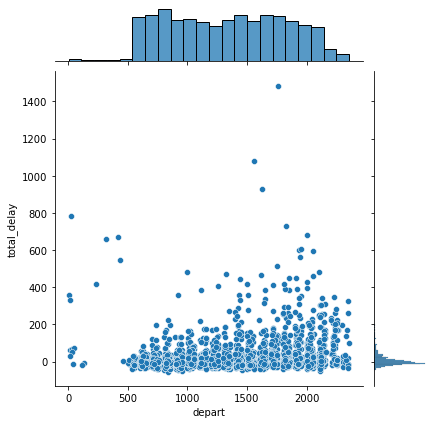

In [14]:
plt.figure()
sns.jointplot(x='depart', y='total_delay', data=df_sample, kind='scatter')

<Figure size 432x288 with 0 Axes>

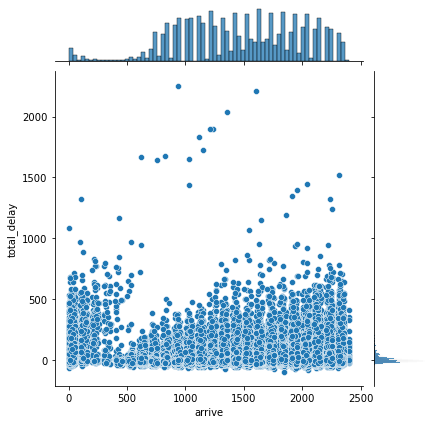

In [16]:
plt.figure()
sns.jointplot(x='arrive', y='total_delay', data=df.sample(100000), kind='scatter')

<Figure size 432x288 with 0 Axes>

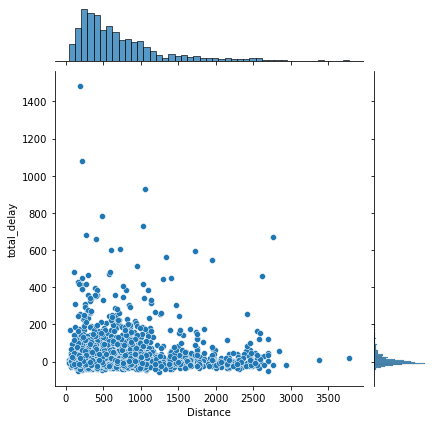

In [17]:
plt.figure()
sns.jointplot(x='Distance', y='total_delay', data=df_sample, kind='scatter')

<Figure size 432x288 with 0 Axes>

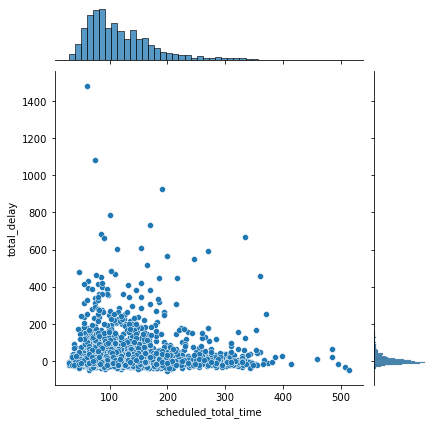

In [18]:
plt.figure()
sns.jointplot(x='scheduled_total_time', y='total_delay', data=df_sample, kind='scatter')

<Figure size 432x288 with 0 Axes>

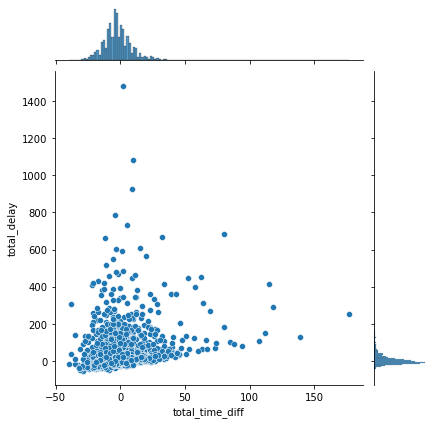

In [19]:
plt.figure()
sns.jointplot(x='total_time_diff', y='total_delay', data=df_sample, kind='scatter')

<Figure size 432x288 with 0 Axes>

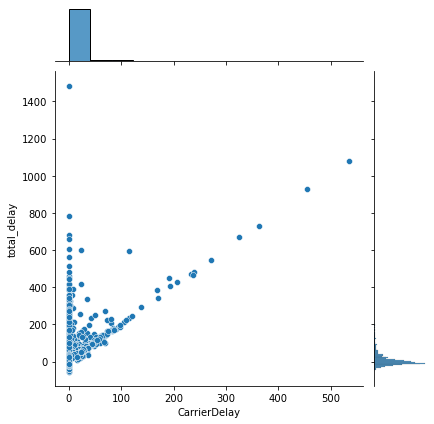

In [20]:
plt.figure()
sns.jointplot(x='CarrierDelay', y='total_delay', data=df_sample, kind='scatter')

<Figure size 432x288 with 0 Axes>

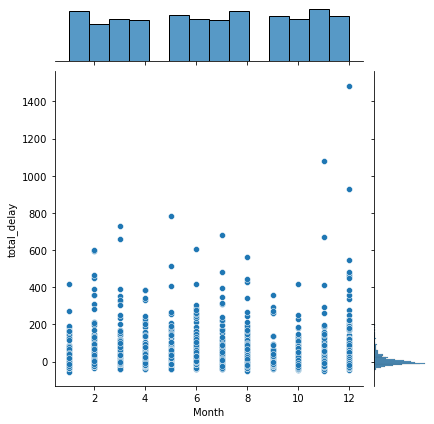

In [58]:
plt.figure()
sns.jointplot(x='Month', y='total_delay', data=df_sample, kind='scatter')

In [21]:
df.CarrierDelay.value_counts()

0       6460366
15        28492
6         26084
7         24544
16        23999
         ...   
803           1
1093          1
977           1
976           1
542           1
Name: CarrierDelay, Length: 1045, dtype: int64

In [22]:
df.CarrierDelay.describe()

count    7.275288e+06
mean     3.959765e+00
std      2.108686e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.580000e+03
Name: CarrierDelay, dtype: float64

In [66]:
df.Origin.value_counts()

ATL    406136
ORD    358462
DFW    287373
DEN    236667
LAX    233940
PHX    208203
IAH    197869
LAS    181402
DTW    173020
MSP    151966
EWR    147842
SLC    146332
SFO    135609
MCO    128286
CLT    124650
BOS    123677
JFK    122035
LGA    116197
CVG    107861
SEA    107797
BWI    107473
PHL    101296
SAN     95938
MDW     94334
IAD     87948
DCA     86172
MEM     83239
TPA     78894
CLE     76679
OAK     73871
FLL     68473
HNL     67151
RDU     65569
MIA     63713
MCI     63702
STL     63426
SJC     60959
BNA     59935
PDX     58074
SMF     57423
HOU     55486
DAL     52832
SNA     51909
AUS     50617
PIT     47968
SAT     45542
IND     42454
ONT     41109
ABQ     40688
CMH     37519
MSY     36872
JAX     35364
BUR     32214
BDL     31790
PBI     29290
TUS     27827
MKE     27516
OMA     27410
RSW     27289
RNO     26968
OKC     26184
BUF     25944
OGG     25282
PVD     24666
TUL     24401
SJU     23332
BHM     23020
SDF     21743
ELP     21529
MHT     20839
ORF     19484
ANC   

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7275288 entries, 0 to 7453214
Data columns (total 69 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Year                  int64 
 1   Month                 int64 
 2   dayofmonth            int64 
 3   weekday               int64 
 4   depart                int64 
 5   scheduled_depart      int64 
 6   arrive                int64 
 7   scheduled_arrive      int64 
 8   UniqueCarrier         object
 9   FlightNum             int64 
 10  TailNum               object
 11  total_time            int64 
 12  scheduled_total_time  int64 
 13  AirTime               int64 
 14  ArrDelay              int64 
 15  DepDelay              int64 
 16  Origin                object
 17  Dest                  object
 18  Distance              int64 
 19  TaxiIn                int64 
 20  TaxiOut               int64 
 21  Cancelled             int64 
 22  Diverted              int64 
 23  CarrierDelay          int64 
 24

In [31]:
df.head()

,Year,Month,dayofmonth,weekday,depart,scheduled_depart,arrive,scheduled_arrive,UniqueCarrier,FlightNum,TailNum,total_time,scheduled_total_time,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,total_delay,total_time_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,uniq_carr_9E,uniq_carr_AA,uniq_carr_AQ,uniq_carr_AS,uniq_carr_B6,uniq_carr_CO,uniq_carr_DL,uniq_carr_EV,uniq_carr_F9,uniq_carr_FL,uniq_carr_HA,uniq_carr_MQ,uniq_carr_NW,uniq_carr_OH,uniq_carr_OO,uniq_carr_UA,uniq_carr_US,uniq_carr_WN,uniq_carr_XE,uniq_carr_YV
0,2007,1,1,1,1232,1225,1341,1340,WN,2891,N351,69,75,54,1,7,SMF,ONT,389,4,11,0,0,0,0,0,0,0,8,-6,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2007,1,1,1,1918,1905,2043,2035,WN,462,N370,85,90,74,8,13,SMF,PDX,479,5,6,0,0,0,0,0,0,0,21,-5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2007,1,1,1,2206,2130,2334,2300,WN,1229,N685,88,90,73,34,36,SMF,PDX,479,6,9,0,0,3,0,0,0,31,70,-2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2007,1,1,1,1230,1200,1356,1330,WN,1355,N364,86,90,75,26,30,SMF,PDX,479,3,8,0,0,23,0,0,0,3,56,-4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2007,1,1,1,831,830,957,1000,WN,2278,N480,86,90,74,-3,1,SMF,PDX,479,3,9,0,0,0,0,0,0,0,-2,-4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [67]:
df['Bin_Carrier_Delay'] = pd.cut(x=df['CarrierDelay'], bins = [0, 5, 15, 30, 45, 60, 75, 90, 120, 180, 240, 2590], include_lowest = True)

In [68]:
pd.crosstab(df['UniqueCarrier'],df['Bin_Carrier_Delay'])

Bin_Carrier_Delay,"(-0.001, 5.0]","(5.0, 15.0]","(15.0, 30.0]","(30.0, 45.0]","(45.0, 60.0]","(60.0, 75.0]","(75.0, 90.0]","(90.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]","(240.0, 2590.0]"
UniqueCarrier,,,,,,,,,,,
9E,231123,3478,5404,2849,1802,1354,939,1249,1098,392,498
AA,551915,19242,18037,8042,4734,3142,2111,2654,2211,819,929
AQ,44100,292,803,276,176,91,59,66,46,24,24
AS,140174,4925,5147,2305,1333,882,548,727,612,242,228
B6,171040,7131,4331,1593,863,552,342,468,430,170,196
CO,297014,7810,6579,2570,1367,888,601,823,826,324,336
DL,430077,12721,11838,4722,2550,1565,1087,1417,1323,498,525
EV,224014,8389,16528,8416,5164,3448,2493,3110,2996,1068,991
F9,88344,3893,2859,844,393,225,133,222,188,77,70


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7275288 entries, 0 to 7453214
Data columns (total 70 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Year                  int64   
 1   Month                 int64   
 2   dayofmonth            int64   
 3   weekday               int64   
 4   depart                int64   
 5   scheduled_depart      int64   
 6   arrive                int64   
 7   scheduled_arrive      int64   
 8   UniqueCarrier         object  
 9   FlightNum             int64   
 10  TailNum               object  
 11  total_time            int64   
 12  scheduled_total_time  int64   
 13  AirTime               int64   
 14  ArrDelay              int64   
 15  DepDelay              int64   
 16  Origin                object  
 17  Dest                  object  
 18  Distance              int64   
 19  TaxiIn                int64   
 20  TaxiOut               int64   
 21  Cancelled             int64   
 22  Diverted          

In [69]:
df.UniqueCarrier.value_counts()

WN    1156958
AA     613836
OO     582871
MQ     516205
UA     477090
US     475583
DL     468323
XE     422305
NW     405872
CO     319138
YV     282585
EV     276617
FL     259869
9E     250186
OH     224471
B6     187116
AS     157123
F9      97248
HA      55935
AQ      45957
Name: UniqueCarrier, dtype: int64

In [35]:
cat_cols = ['UniqueCarrier', 'Origin', 'CarrierDelay', 'dayofmonth', 'weekday']
cont_cols = ['total_delay', 'Distance', 'total_time_diff']

In [36]:
# Creating a plot loop that iterates through all combinations of variables
def plot_categorical_and_continuous_vars(train, cat_cols, cont_cols):
    train_sample = train.sample(5000)
    for cont in cont_cols:
        for cat in cat_cols:
            fig = plt.figure(figsize= (20, 10))
            fig.suptitle(f'{cont} vs {cat}')
            

            plt.subplot(131)
            sns.stripplot(data=train_sample, x = cat, y = cont)
           

            plt.subplot(1, 3, 3)
            sns.boxplot(data = train_sample, x = cont, hue = cat)
            
            
            plt.subplot(1, 3, 2)
            sns.barplot(data = train_sample, x = cat, y = cont)

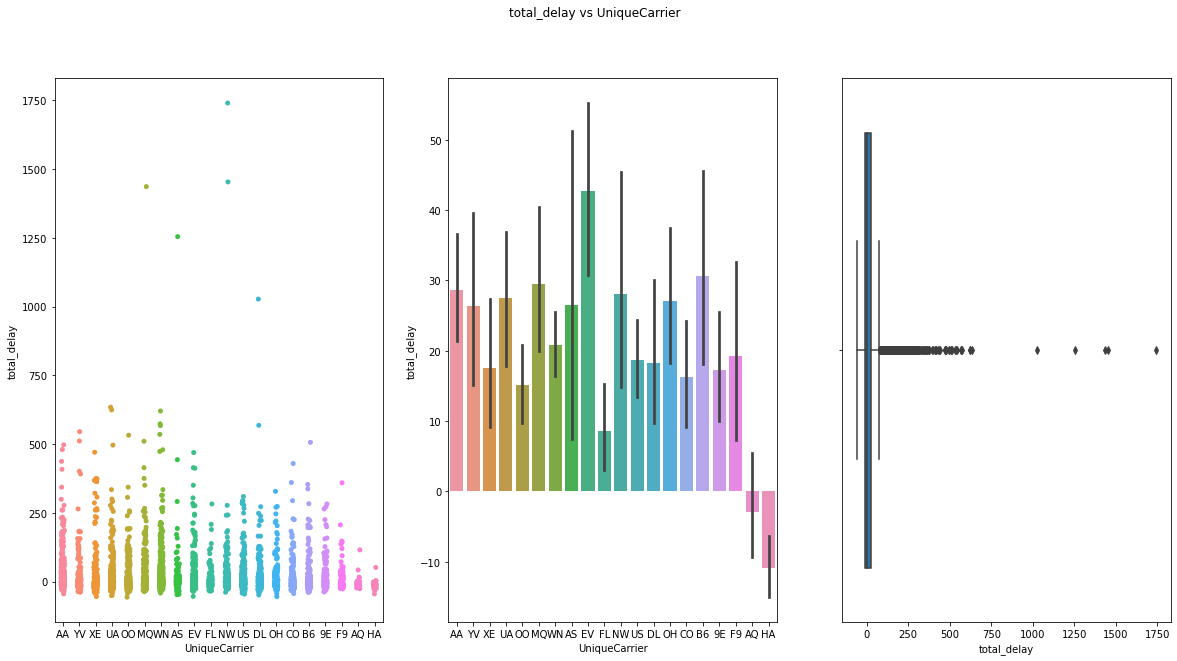

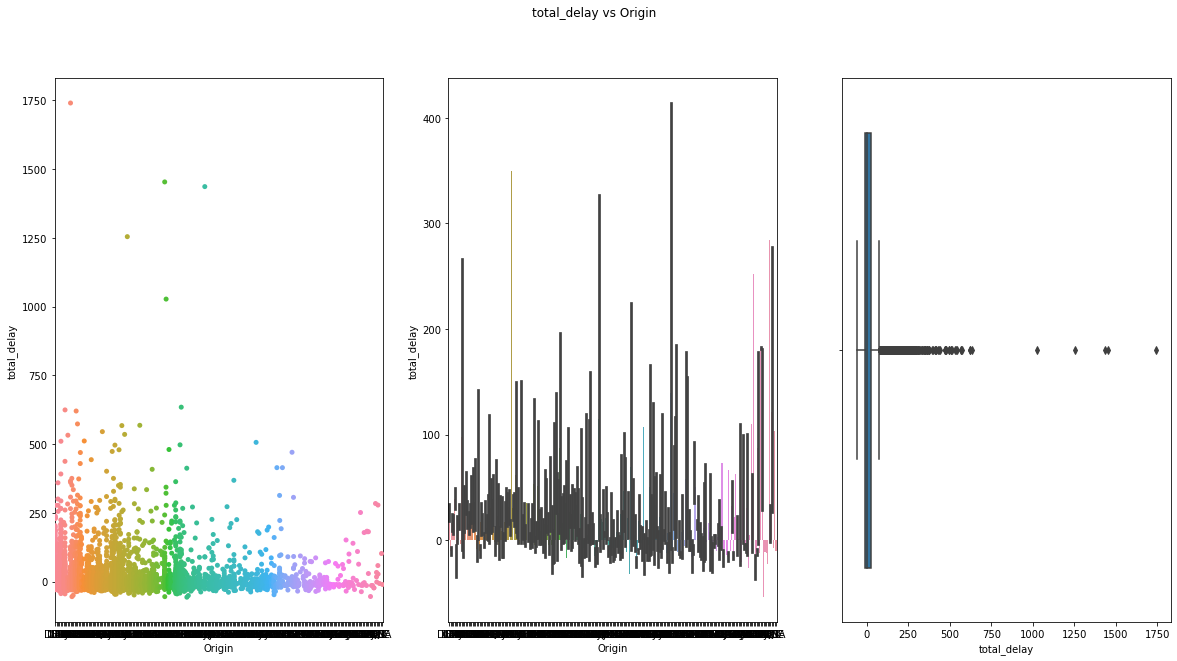

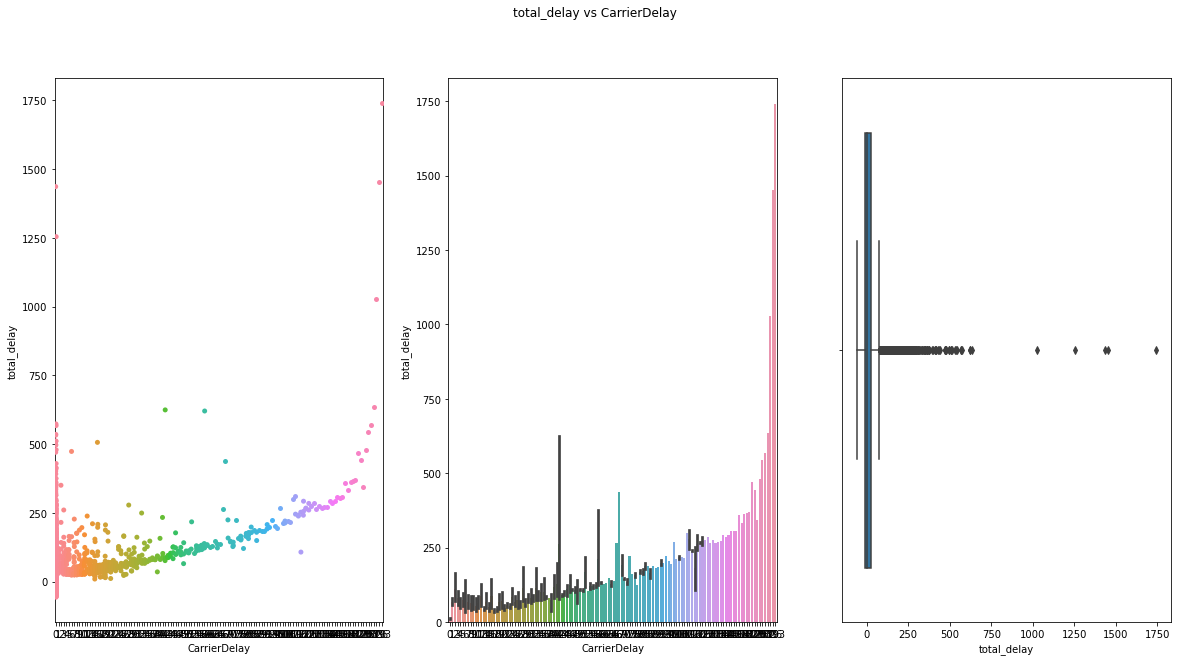

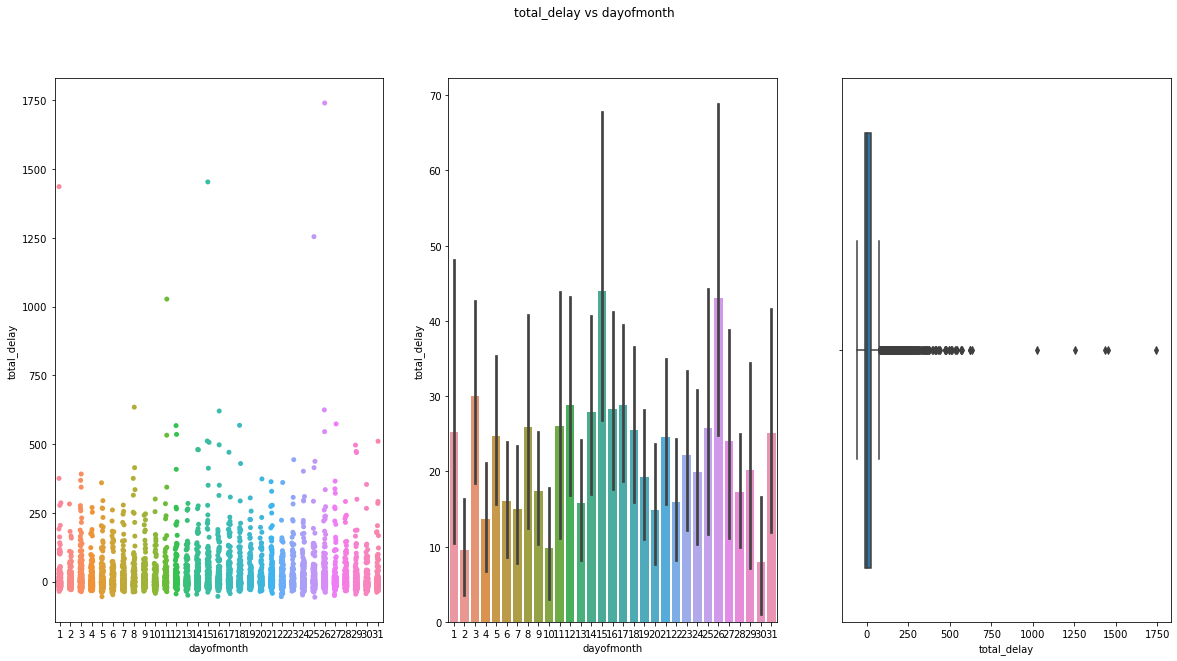

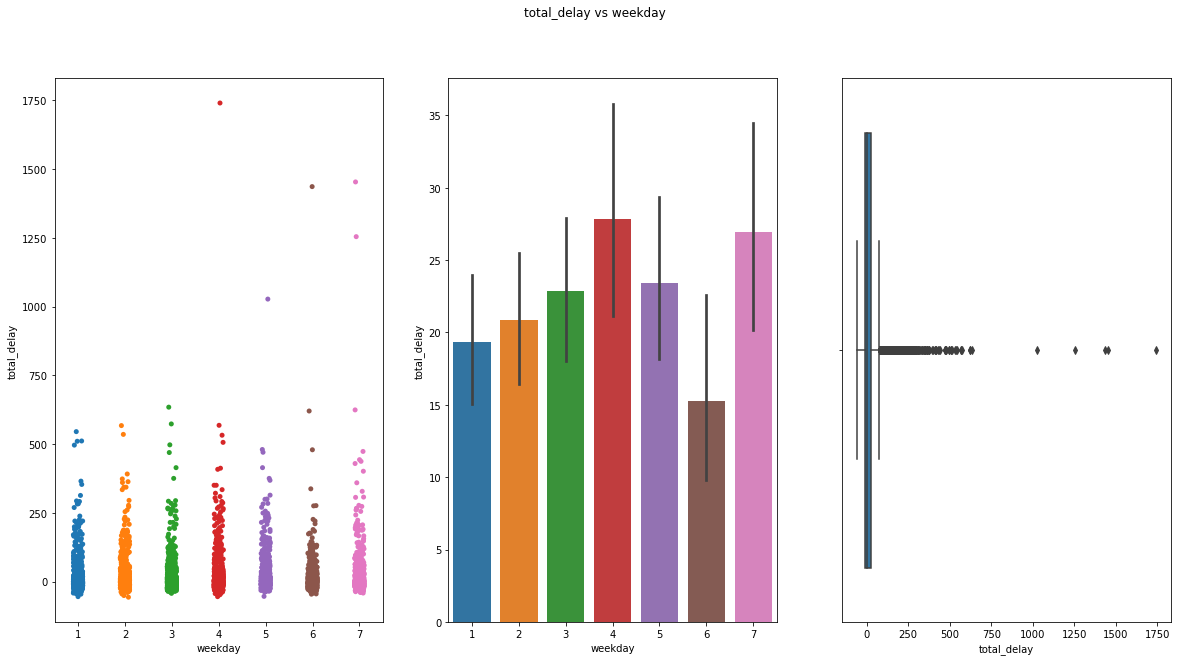

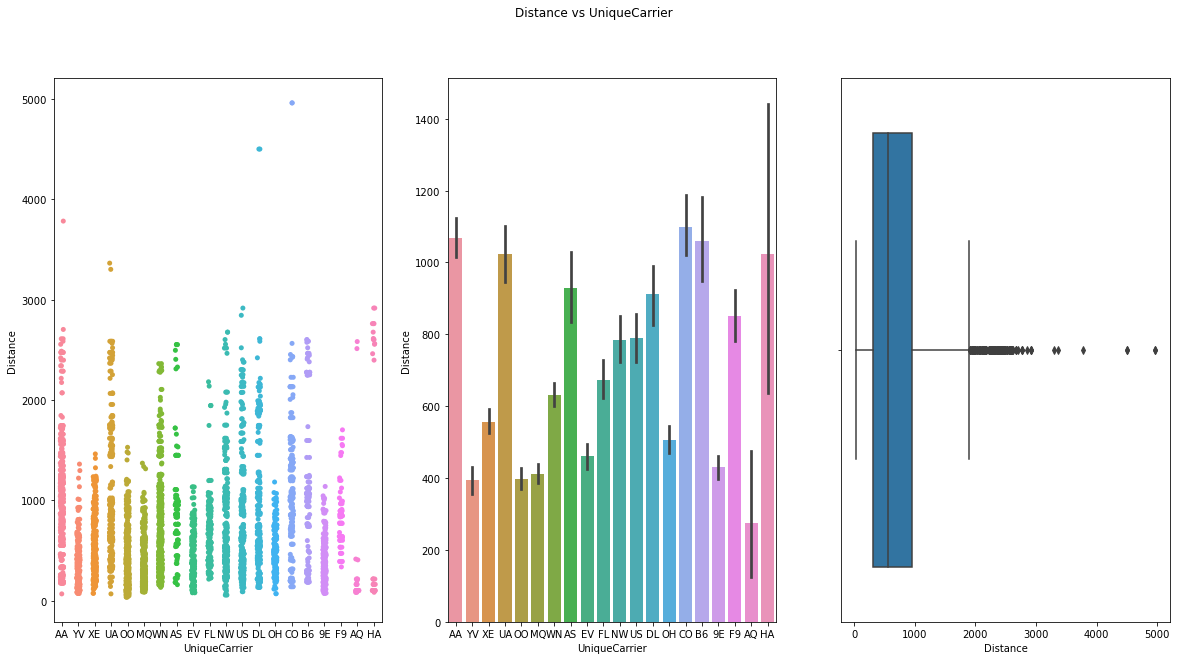

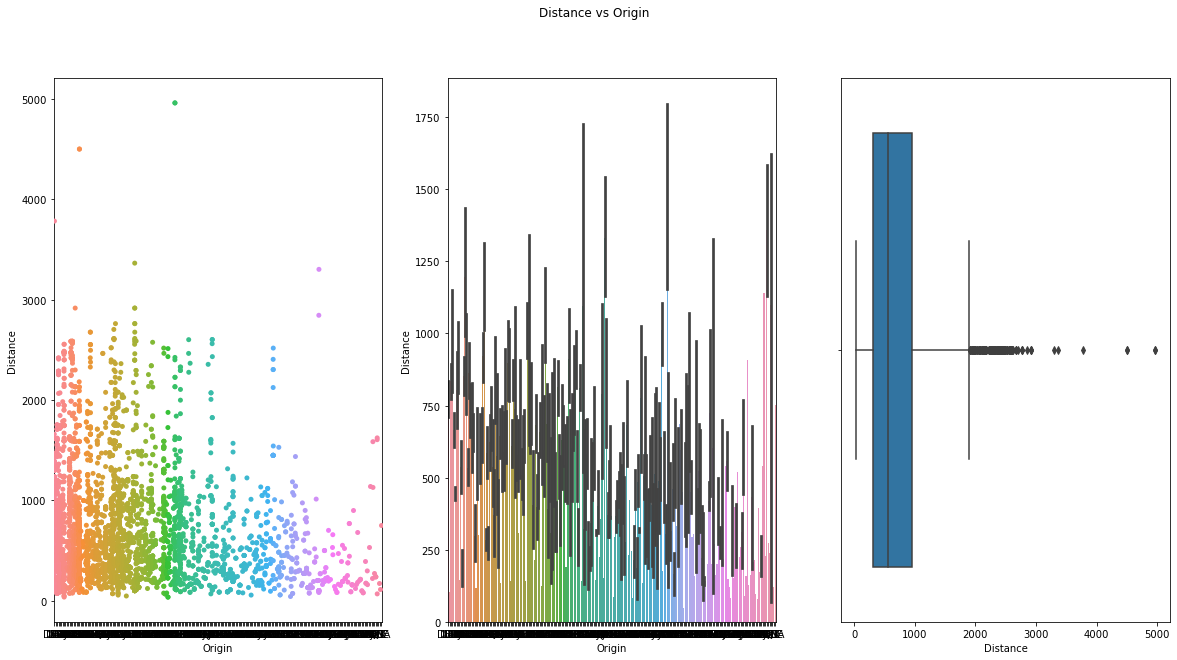

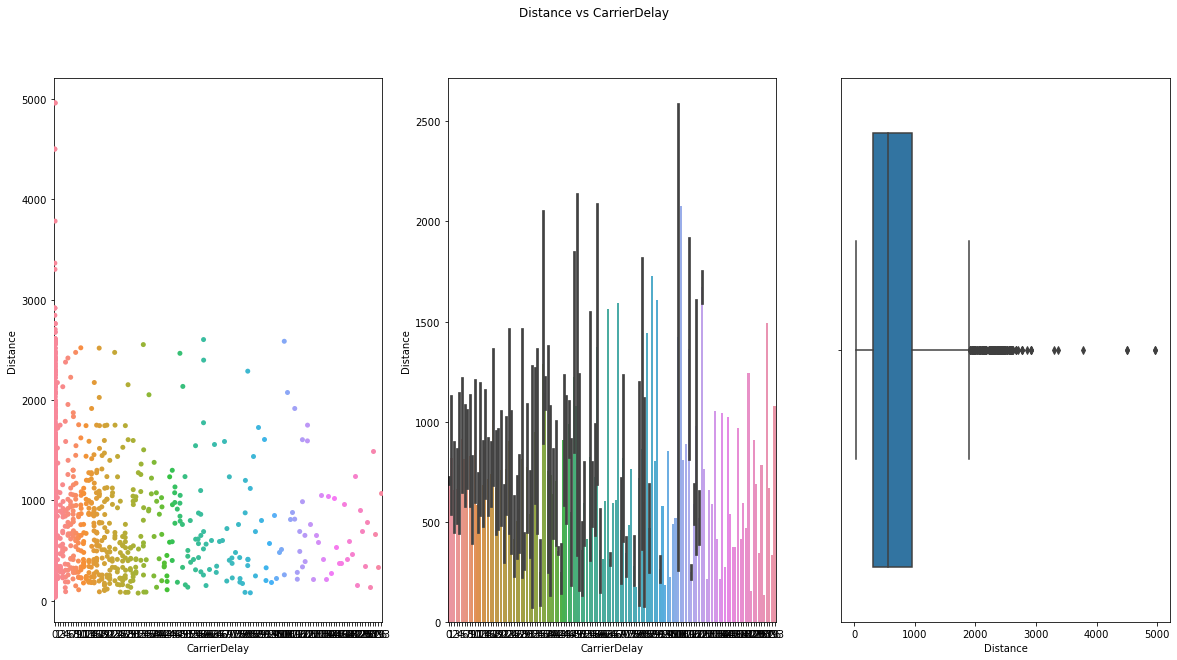

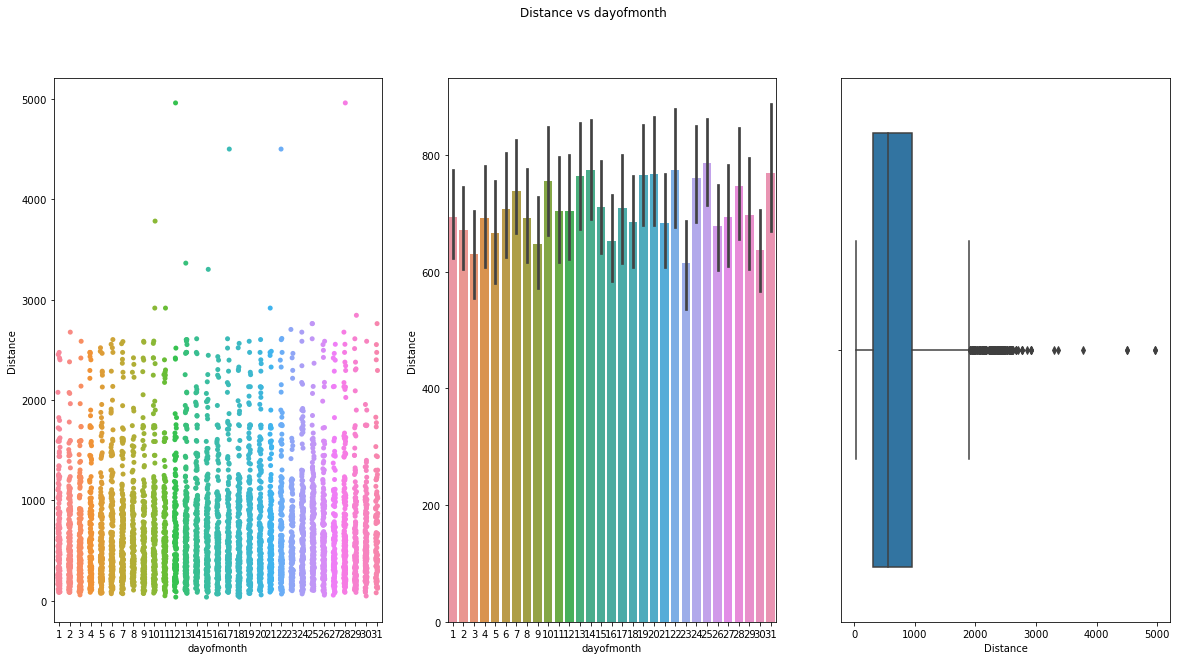

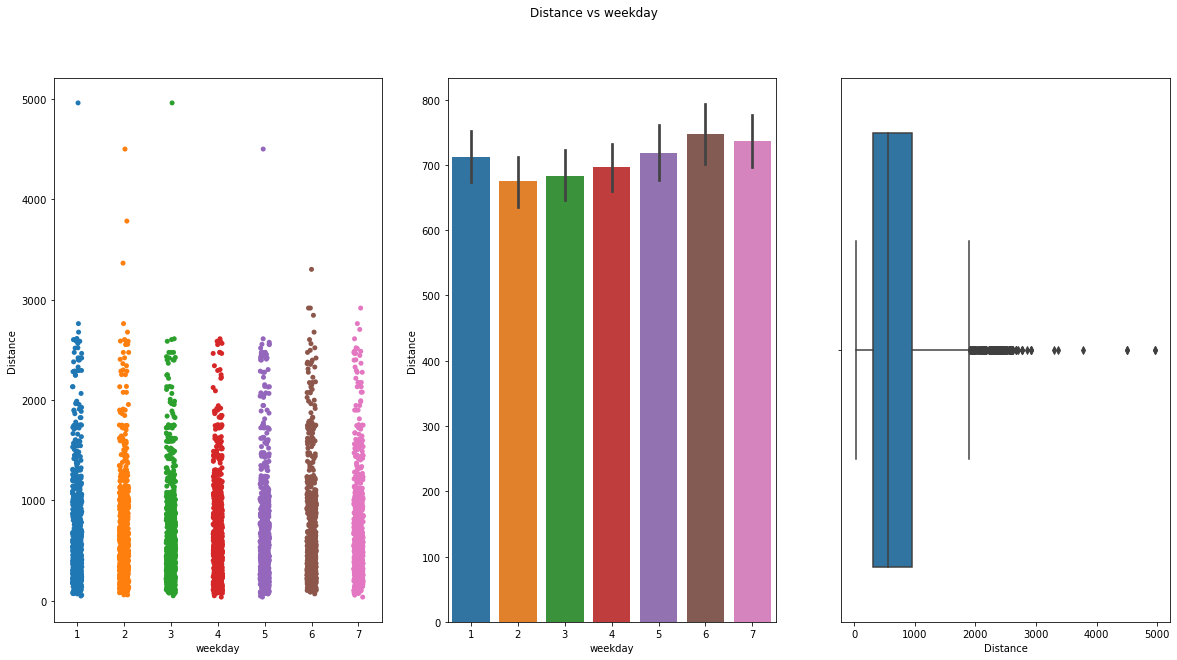

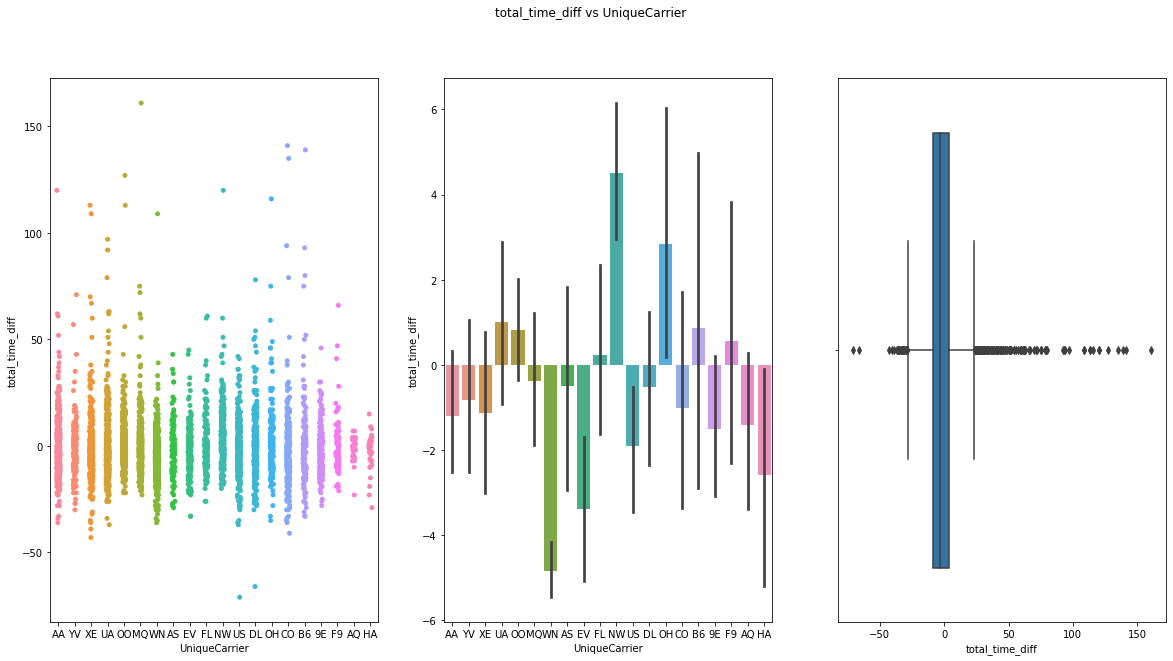

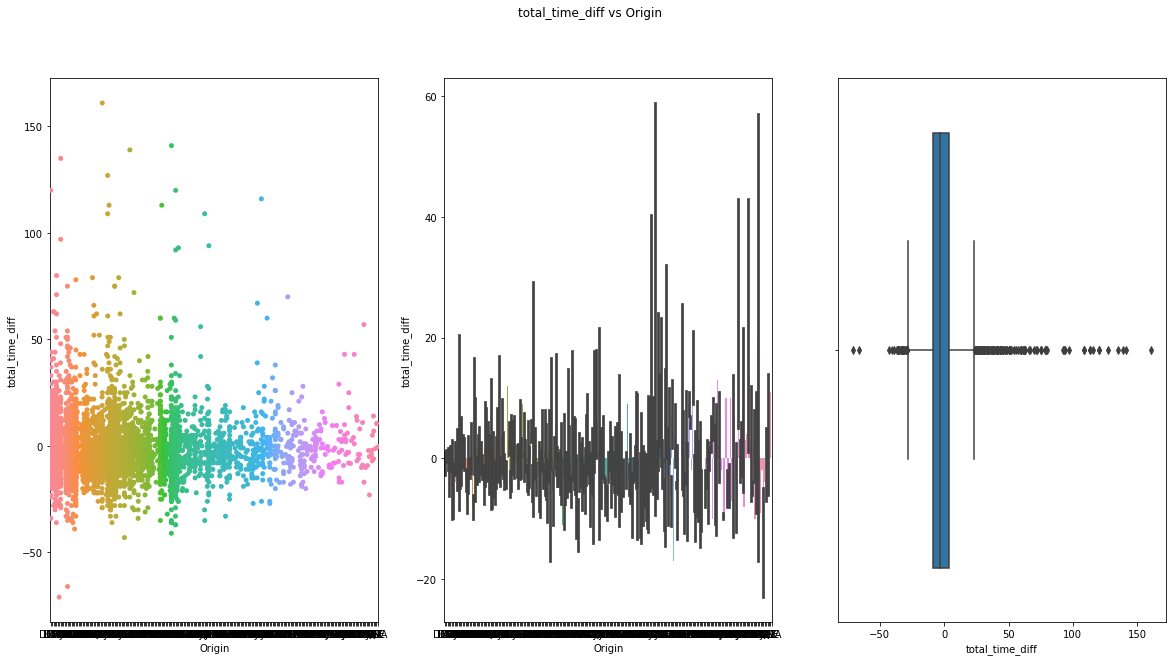

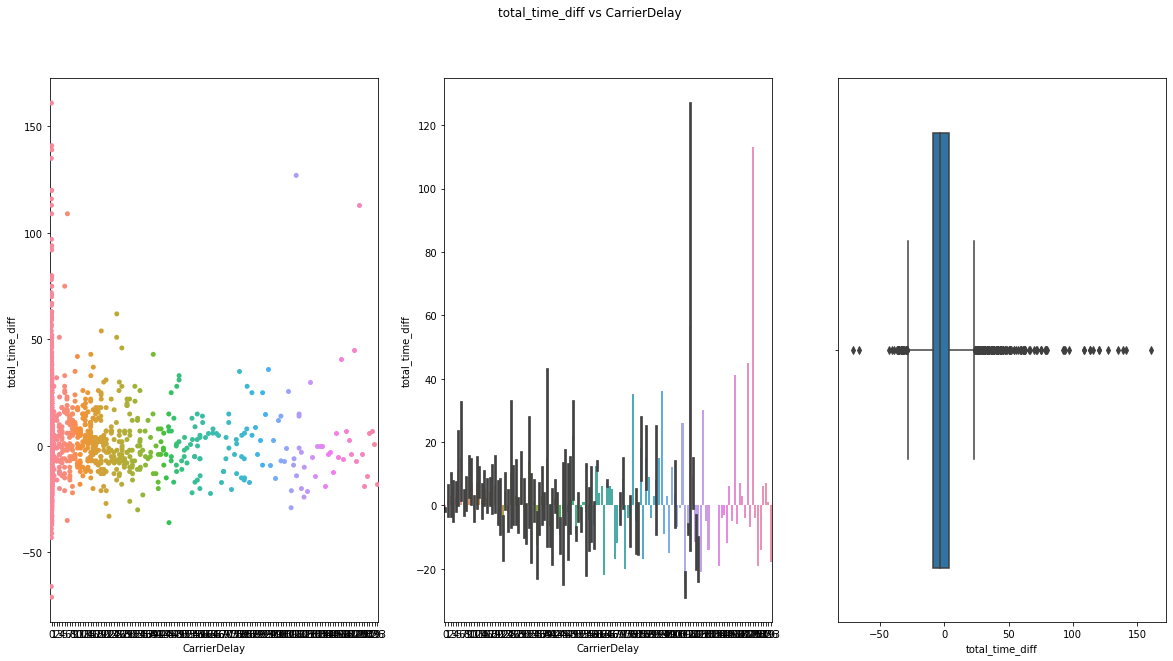

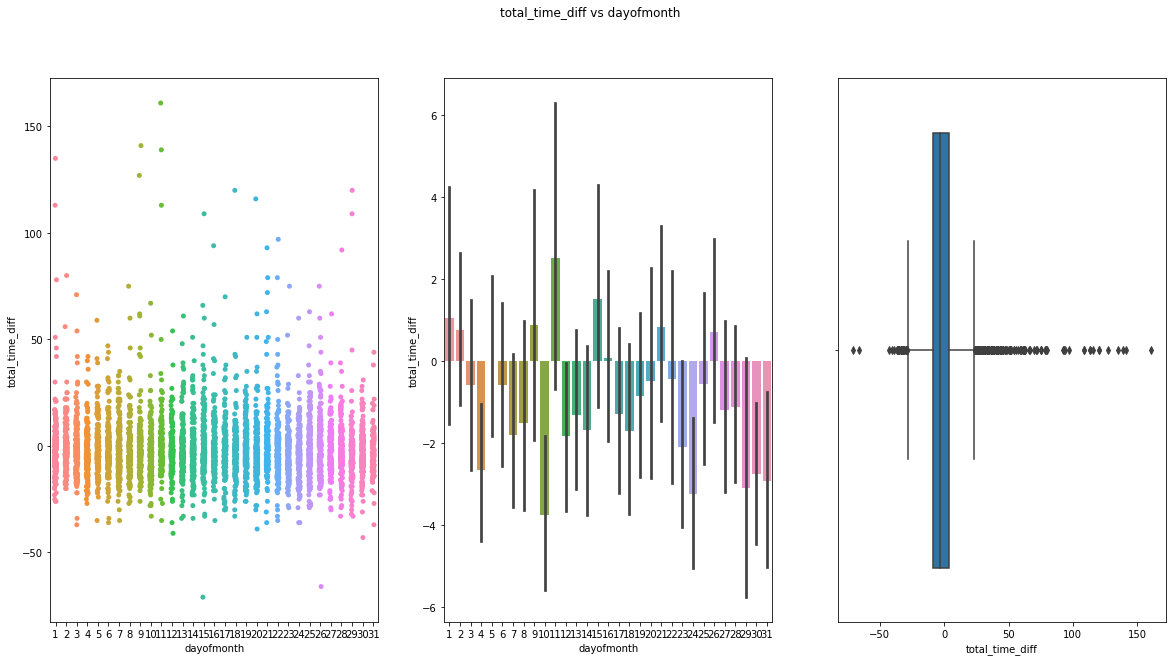

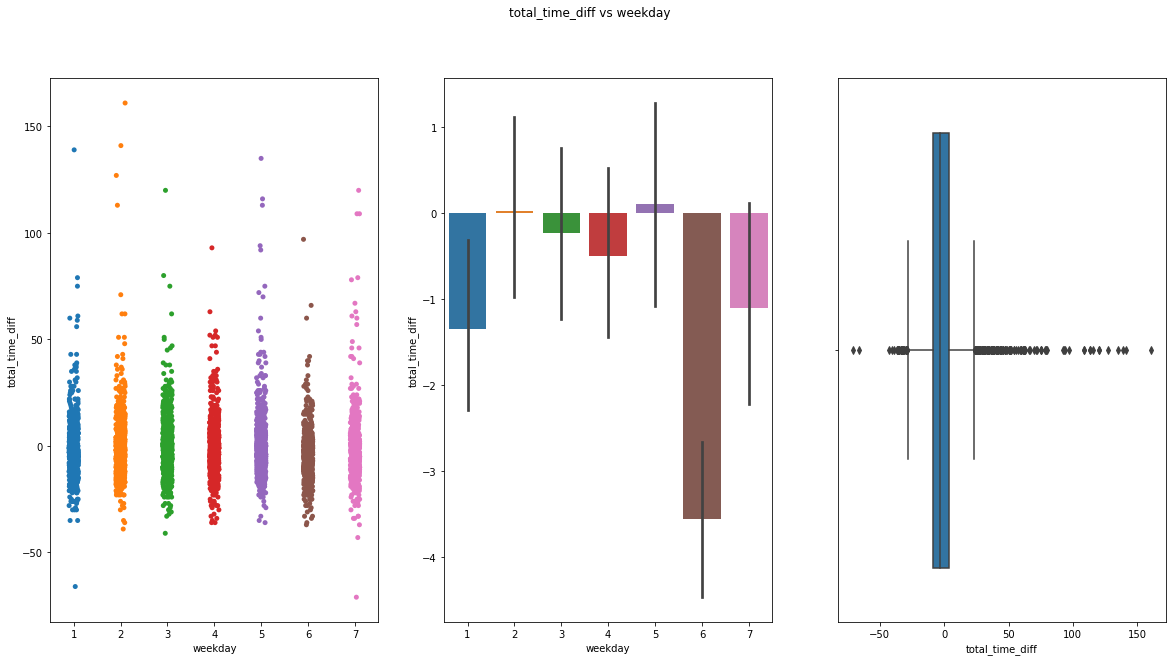

In [37]:
# Visualizing relationships between cat and cont variables:
plot_categorical_and_continuous_vars(train, cat_cols, cont_cols)

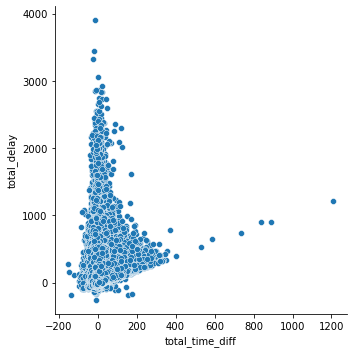

In [38]:
sns.relplot(x="total_time_diff", y="total_delay", data=train)
plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7275288 entries, 0 to 7453214
Data columns (total 70 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Year                  int64   
 1   Month                 int64   
 2   dayofmonth            int64   
 3   weekday               int64   
 4   depart                int64   
 5   scheduled_depart      int64   
 6   arrive                int64   
 7   scheduled_arrive      int64   
 8   UniqueCarrier         object  
 9   FlightNum             int64   
 10  TailNum               object  
 11  total_time            int64   
 12  scheduled_total_time  int64   
 13  AirTime               int64   
 14  ArrDelay              int64   
 15  DepDelay              int64   
 16  Origin                object  
 17  Dest                  object  
 18  Distance              int64   
 19  TaxiIn                int64   
 20  TaxiOut               int64   
 21  Cancelled             int64   
 22  Diverted          

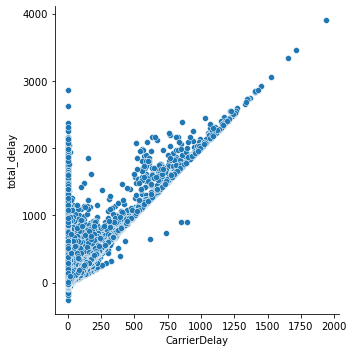

In [43]:
sns.relplot(x="CarrierDelay", y="total_delay", data=train)
plt.show()

### Exploring Categorical Vars

In [70]:
# Define function which plots a categorical and continuous var
def plot_categorical_and_continuous_vars(df, categorical, continuous):
    df_sample = df.sample(5000)
    plt.figure()
    sns.countplot(x=categorical, data=df_sample)
    plt.figure()
    sns.swarmplot(x=categorical, y=continuous, data=df_sample)
    plt.figure()
    sns.boxplot(x=categorical, y=continuous, data=df_sample)
    plt.figure()
    sns.violinplot(x=categorical, y=continuous, data=df_sample)
    plt.figure()
    sns.barplot(x=categorical, y=continuous, data=df_sample)

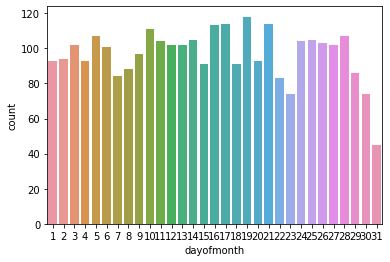

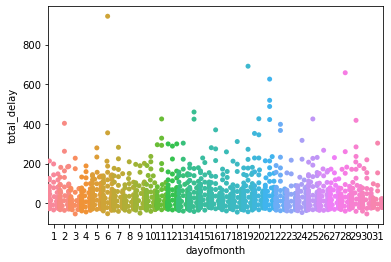

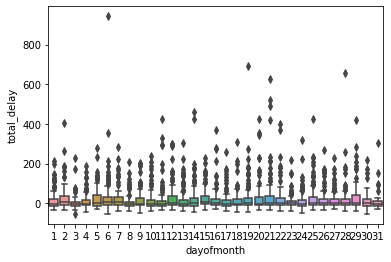

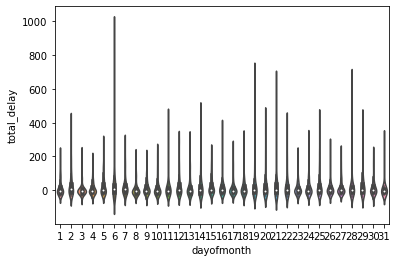

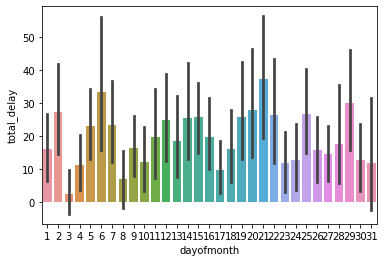

In [ ]:
plot_categorical_and_continuous_vars(train, 'UniqueCarrier', 'total_delay')

In [56]:
df.CarrierDelay.value_counts()

0       6460366
15        28492
6         26084
7         24544
16        23999
         ...   
803           1
1093          1
977           1
976           1
542           1
Name: CarrierDelay, Length: 1045, dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7275288 entries, 0 to 7453214
Data columns (total 70 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Year                  int64   
 1   Month                 int64   
 2   dayofmonth            int64   
 3   weekday               int64   
 4   depart                int64   
 5   scheduled_depart      int64   
 6   arrive                int64   
 7   scheduled_arrive      int64   
 8   UniqueCarrier         object  
 9   FlightNum             int64   
 10  TailNum               object  
 11  total_time            int64   
 12  scheduled_total_time  int64   
 13  AirTime               int64   
 14  ArrDelay              int64   
 15  DepDelay              int64   
 16  Origin                object  
 17  Dest                  object  
 18  Distance              int64   
 19  TaxiIn                int64   
 20  TaxiOut               int64   
 21  Cancelled             int64   
 22  Diverted          

### Initial Explore conclusion
- Carrier Delays appear to be greatest of all delays
    - Certain Carriers have more Carrier Delays than others; Carriers with highest delays:
        - JetBlue
        - American Airlines (may be due to number of flights comparatively)
- It seems airlines include extra scheduled flight time
    - Even with small delays, pilots are usually able to make up time in the air
    - Thus: Departure Delays seem to be greater than Arrival Delays
- The difference in actual total time of a flight and total scheduled time has a negative correlation with weekends and Mondays. Could be cultural/human phenomenon where people move faster because they want to finish the job and get home.


Variables with which to continue:
- Month
- weekday
- UniqueCarrier
- Origin
- total_time_diff
- total_delay (target var)

# MAIN EXPLORE

## Questions/Hypotheses

1. Does the month one flies influence flight delay?
- Ho = Population Means of total_delay for days of the week are all equal
- Ha = Population Means of total_delay for days of the week are NOT all equal

2. Does weekday flown influence flight delay?
- Ho = Population Means of total_delay for days of the week are all equal
- Ha = Population Means of total_delay for days of the week are NOT all equal

3. Does the Carrier you use affect flight delay?
- Ho = Population Means of total_delay for top carriers are all equal
- Ha = Population Means of total_delay for top carriers are NOT all equal

4. Does Origin airport (where you begin) influence?
- Ho = Population Means of total_delay for top airports are all equal
- Ha = Population Means of total_delay for top airports are NOT all equal

5. Does total_time_diff have a relationship to flight delay?
- Ho = More total_time_diff translates to <= total_delay 
- Ha = More total_time_diff translates to > total_delay

**NOTE**
Adam K advice:\
Don't do useless ANOVAs. \
Pick one subsample (ie. Chicago Airport out of all Origins) and run 1 sample t-test to see whether mean delay for that airport is different from the overall mean delay\
Do this for all categorical vars

### 1. Does the month one flies influence flight delay?
- Ho = Population Means of total_delay for days of the week are all equal
- Ha = Population Means of total_delay for days of the week are NOT all equal

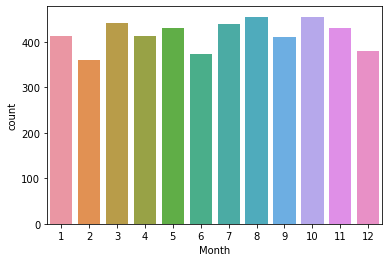

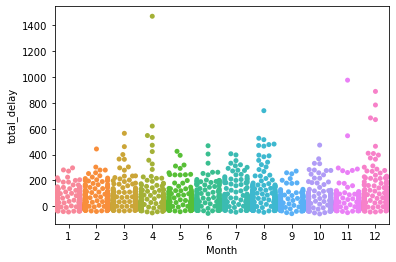

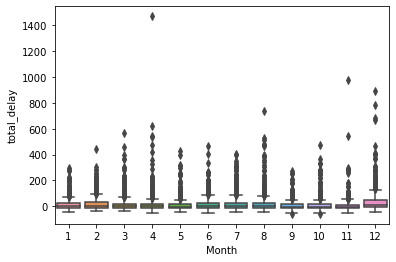

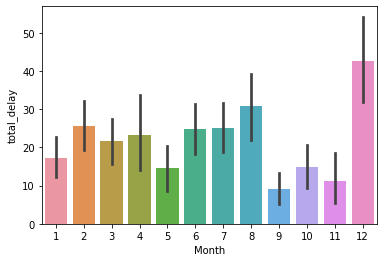

In [74]:
explore.plot_categorical_and_continuous_vars(train, 'Month', 'total_delay')

### 2. Does weekday flown influence flight delay?
- Ho = Population Means of total_delay for days of the week are all equal
- Ha = Population Means of total_delay for days of the week are NOT all equal

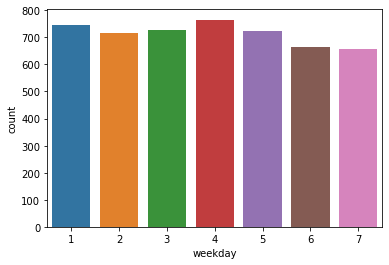

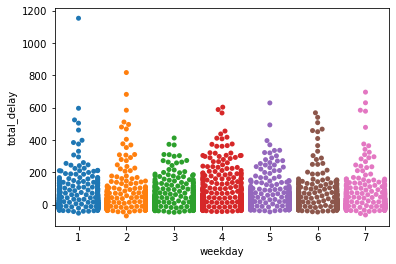

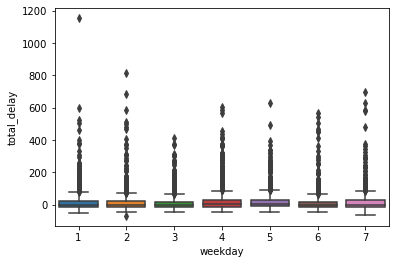

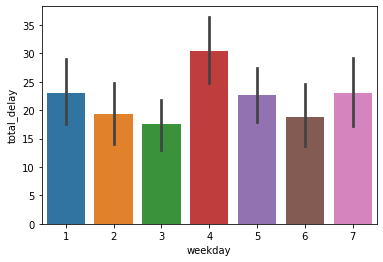

In [75]:
explore.plot_categorical_and_continuous_vars(train, 'weekday', 'total_delay')

### 3. Does the Carrier you use affect flight delay?
- Ho = Population Means of total_delay for top carriers are all equal
- Ha = Population Means of total_delay for top carriers are NOT all equal

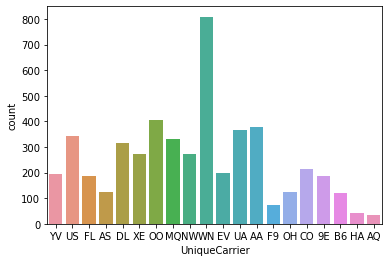

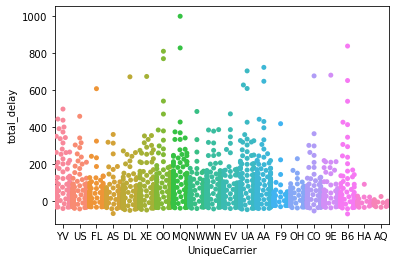

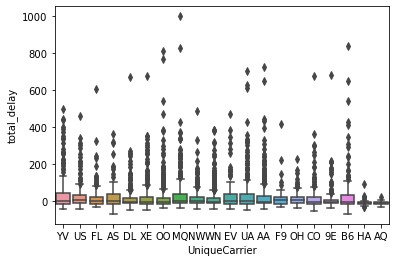

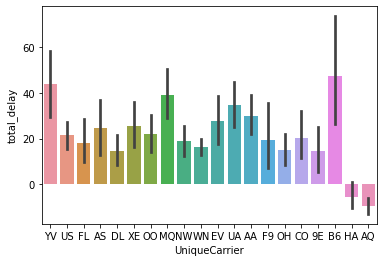

In [76]:
explore.plot_categorical_and_continuous_vars(train, 'UniqueCarrier', 'total_delay')

### 4. Does Origin airport (where you begin) influence?
- Ho = Population Means of total_delay for top airports are all equal
- Ha = Population Means of total_delay for top airports are NOT all equal

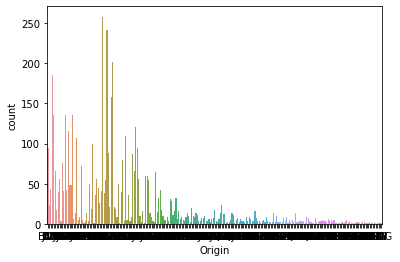

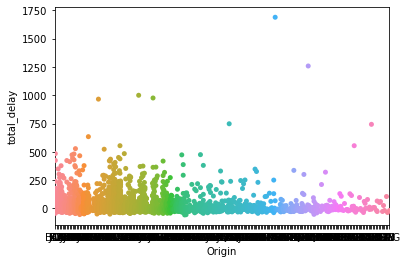

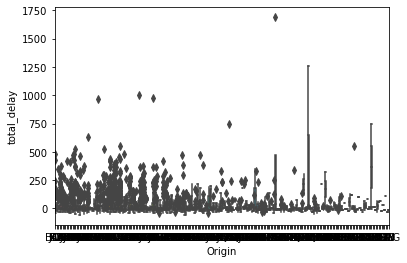

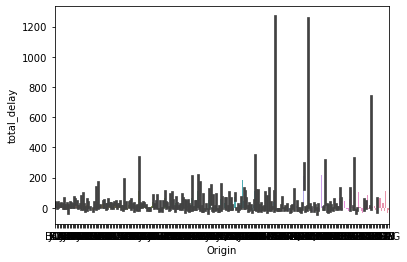

In [77]:
explore.plot_categorical_and_continuous_vars(train, 'Origin', 'total_delay')

### 5. Does total_time_diff have a relationship to flight delay?
- Ho = More total_time_diff translates to <= total_delay 
- Ha = More total_time_diff translates to > total_delay

<Figure size 432x288 with 0 Axes>

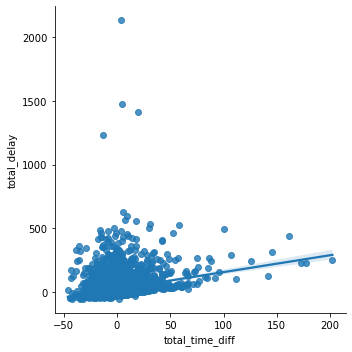

<Figure size 432x288 with 0 Axes>

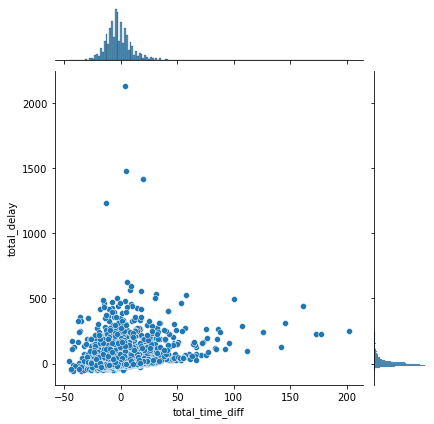

In [79]:
explore.plot_continuous_and_continuous_vars(train, 'total_time_diff', 'total_delay')